## –ú–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –æ–±—ä–µ–º–∞ —É–±–æ—è –ö–†–° –ø–æ –ê–∫–º–æ–ª–∏–Ω—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
from IPython.display import display
import math
from prophet import Prophet
pd.set_option('display.max_columns', 130)


import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ EDA

In [269]:
df = pd.read_excel("–î–∞—Ç–∞—Å–µ—Ç –ø–æ –ö–†–°.xlsx")
df.sample(10)

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  \
144              –ê–ö–¢–Æ–ë–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2017-01  5371.21    17.5   
597   –í–û–°–¢–û–ß–ù–û-–ö–ê–ó–ê–•–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-10  3396.22    24.1   
630                          –ì–ê–õ–ú–ê–¢–´  2017-07     6.30     NaN   
890                     –ì–û–†–û–î –ê–õ–ú–ê–¢–´  2019-03      NaN    27.7   
83               –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2021-12  4504.14     4.5   
2115            –ü–ê–í–õ–û–î–ê–†–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2020-05  3386.57     6.3   
1154                   –ì–û–†–û–î –®–´–ú–ö–ï–ù–¢  2024-08      NaN     0.4   
1494          –ö–ê–†–ê–ì–ê–ù–î–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2016-05  3720.99    35.2   
1911           –ú–ê–ù–ì–ò–°–¢–ê–£–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2021-02   160.10    14.7   
1436   –ó–ê–ü–ê–î–ù–û-–ö–ê–ó–ê–•–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2021-07  2665.17    15.6   

      –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  
144         386563.0   -10.119355  
597         403944.0     7.209677  
630              NaN          NaN  
890           3128.0     8.200000  
83          461525.0    -8.493548  
2115        533946.0    18.625806  
1154        109444.0    26.658065  
1494        656036.0    12.638710  
1911         23372.0     1.735714  
1436        753870.0    25.264516

In [270]:
df_akmola = df[df['–†–µ–≥–∏–æ–Ω'] == '–ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨']
df_akmola = df_akmola.drop('–†–µ–≥–∏–æ–Ω', axis = 'columns')
df_akmola.head()

–ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  2015-01  4455.35     9.8        372560.0   -12.490323
1  2015-02  3654.20     9.8        399442.0   -10.192857
2  2015-03  4287.08     8.3        425605.0    -5.870968
3  2015-04  3923.21     8.8        440023.0     4.490000
4  2015-05  3849.70    42.8        444647.0    14.574194

In [271]:
df_akmola = df_akmola.rename(columns={'–ö–†–°': '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°'})
df_akmola.head()

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  2015-01          4455.35     9.8        372560.0   -12.490323
1  2015-02          3654.20     9.8        399442.0   -10.192857
2  2015-03          4287.08     8.3        425605.0    -5.870968
3  2015-04          3923.21     8.8        440023.0     4.490000
4  2015-05          3849.70    42.8        444647.0    14.574194

In [272]:
df_akmola['–ü–µ—Ä–∏–æ–¥'] = pd.to_datetime(df_akmola['–ü–µ—Ä–∏–æ–¥'], format='%Y-%m')
df_akmola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   –ü–µ—Ä–∏–æ–¥           120 non-null    datetime64[ns]
 1   –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  120 non-null    float64       
 2   –û—Å–∞–¥–∫–∏           120 non-null    float64       
 3   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°   120 non-null    float64       
 4   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞      120 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.6 KB


In [273]:
df_akmola.isna().sum()

–ü–µ—Ä–∏–æ–¥             0
–û–±—ä–µ–º —É–±–æ—è: –ö–†–°    0
–û—Å–∞–¥–∫–∏             0
–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°     0
–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞        0
dtype: int64

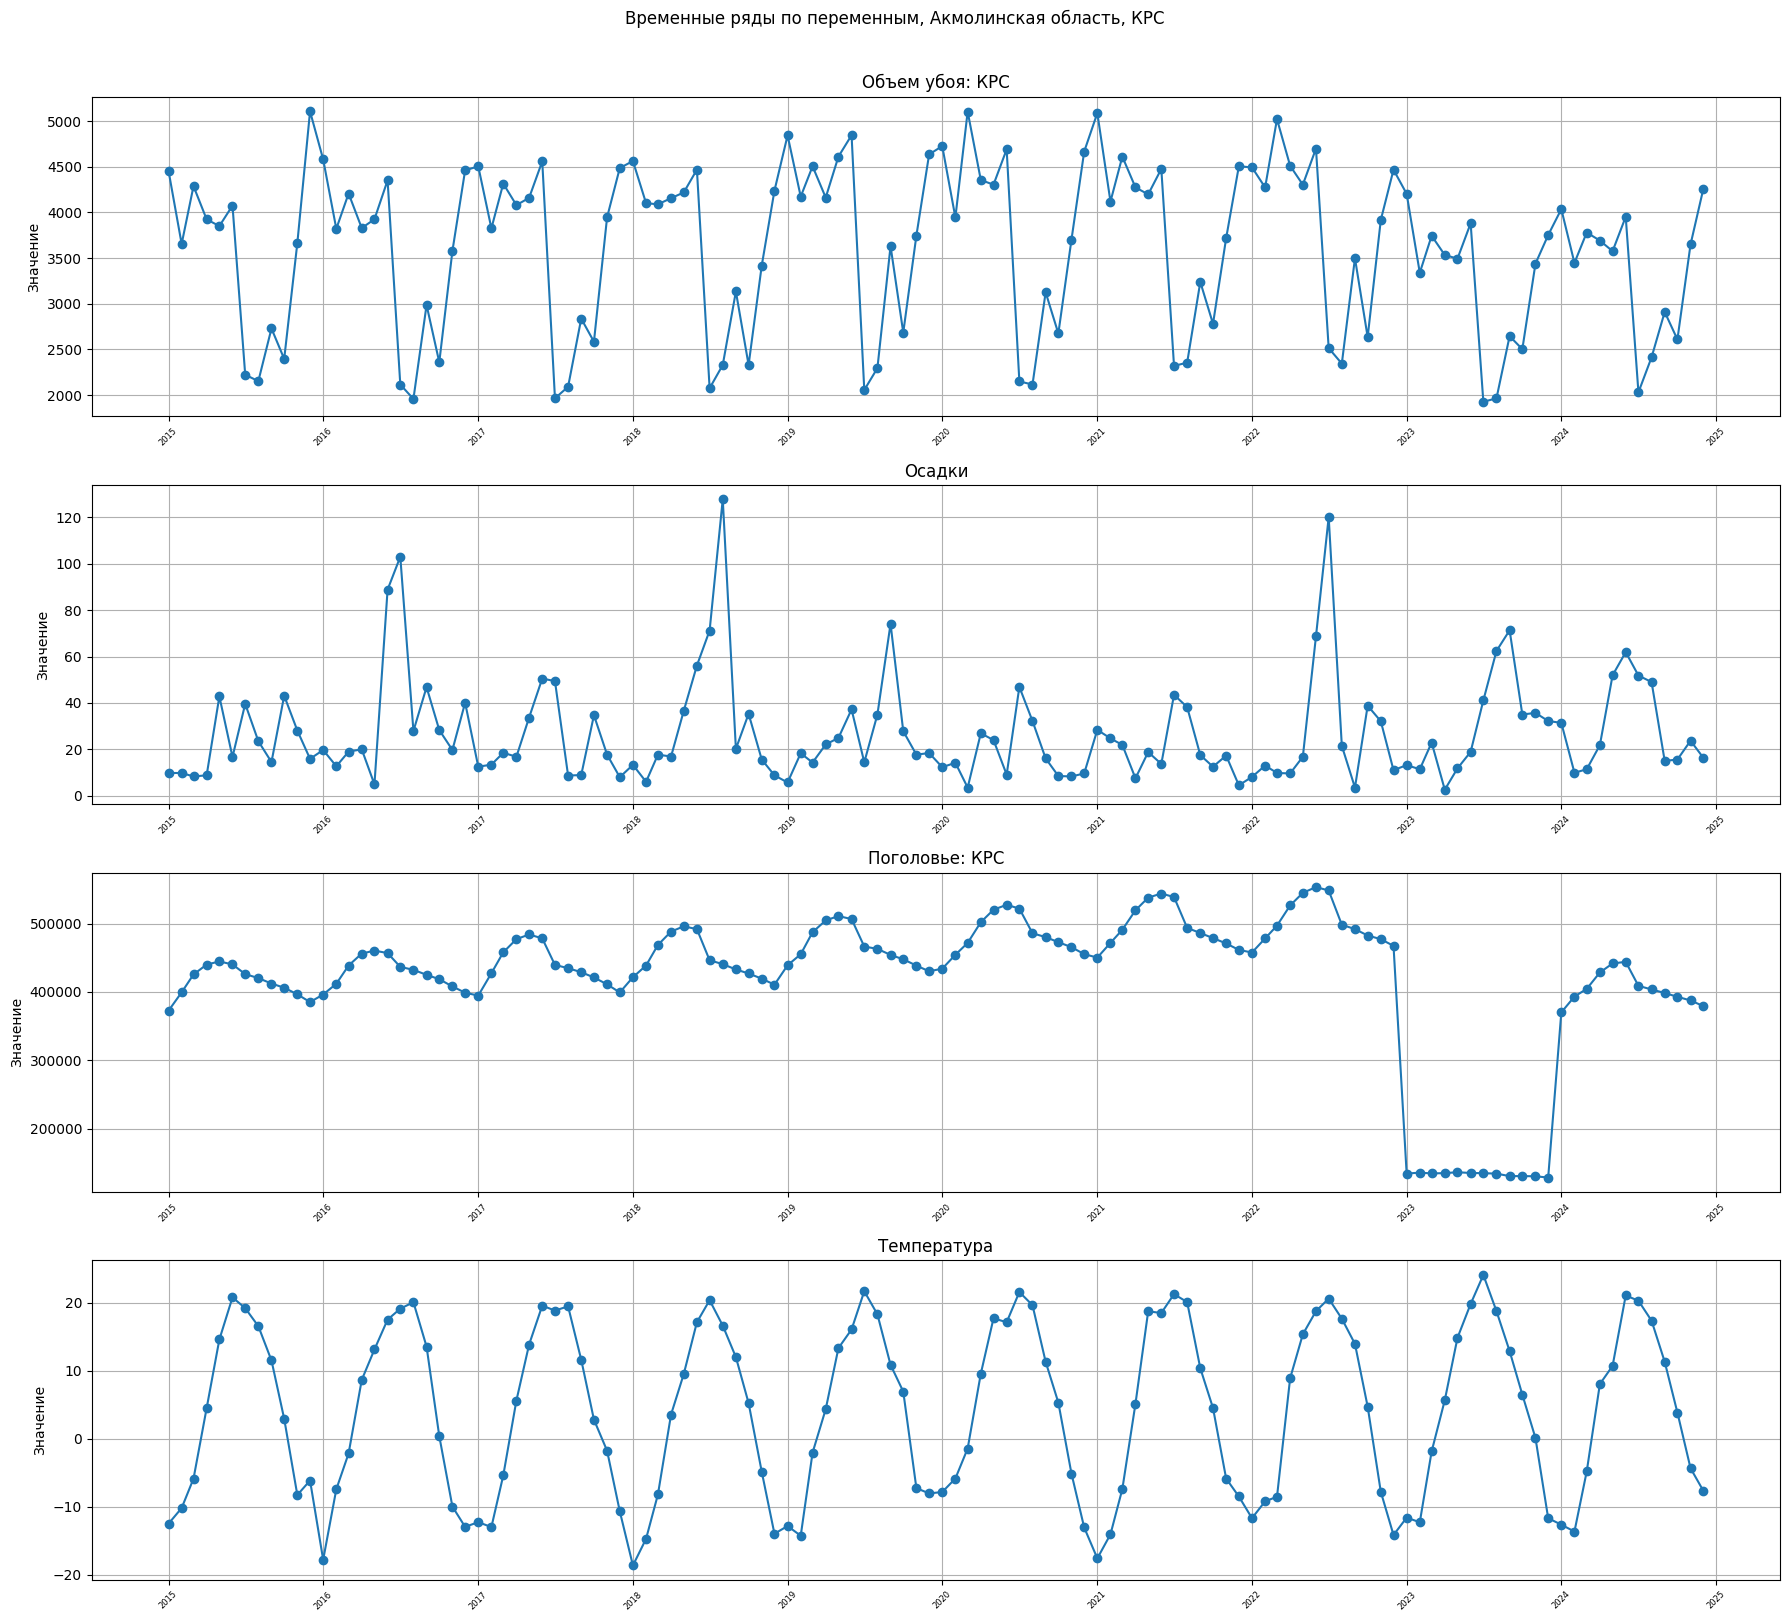

In [274]:
# Plot each variable in its own subplot
value_cols = [col for col in df_akmola.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]

n = len(value_cols)
plt.figure(figsize=(18, 4 * n))

for i, col in enumerate(value_cols, 1):
    plt.subplot(n, 1, i)
    plt.plot(df_akmola["–ü–µ—Ä–∏–æ–¥"], df_akmola[col], marker="o")
    plt.title(f"{col}")
    plt.grid(True)
    plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
    plt.xticks(rotation=45, fontsize = 6)

plt.suptitle("–í—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", y=1.01)
plt.tight_layout()
plt.show()

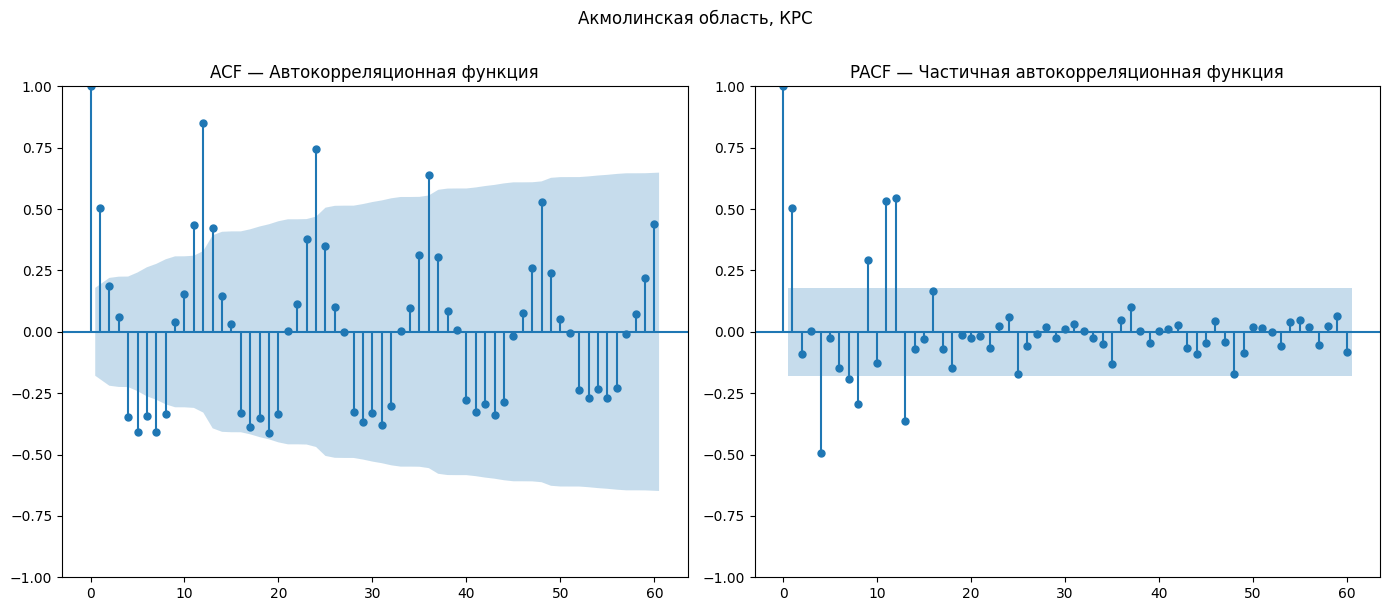

In [275]:
y = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].sort_index()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(y, lags=60, ax=plt.gca(), title="ACF ‚Äî –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è")

plt.subplot(1, 2, 2)
plot_pacf(y, lags=60, ax=plt.gca(), title="PACF ‚Äî –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", method="ywm")
plt.suptitle("–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", y=1.01)

plt.tight_layout()
plt.show()

–ì—Ä–∞—Ñ–∏–∫–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –∏ —á–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–π —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **—Å–∏–ª—å–Ω—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Å–ª–µ–¥—É—é—â–µ–≥–æ –º–µ—Å—è—Ü–∞** –∏ –Ω–∞ –≤–æ–∑–º–æ–∂–Ω—É—é **–≥–æ–¥–æ–≤—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å** (–ø–∏–∫–∏ –Ω–∞ +12, +24 –∏ +36 –º–µ—Å—è—Ü–µ–≤). 

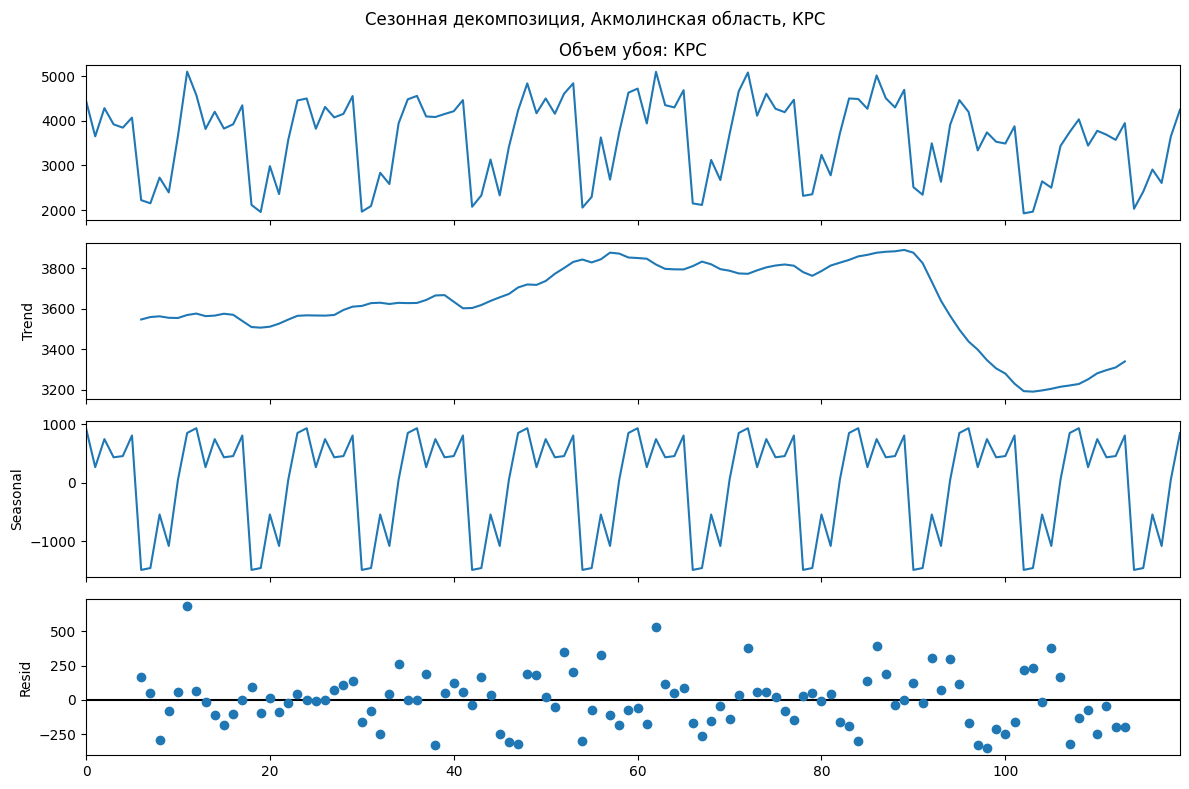

In [276]:
# Perform decomposition (period=12 for monthly data)
decomposition = seasonal_decompose(df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"], model="additive", period=12)

# Plot with larger figure size
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("–°–µ–∑–æ–Ω–Ω–∞—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", fontsize=12)
plt.tight_layout()
plt.show()


In [277]:
# Run ADF test
result = adfuller(df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"])

# Display results
print("üìä Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# Interpretation
if result[1] < 0.05:
    print("‚úÖ The series is likely **stationary** (reject H‚ÇÄ).")
else:
    print("‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).")


üìä Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.2365
p-value: 0.6577
Critical Value (1%): -3.4930
Critical Value (5%): -2.8890
Critical Value (10%): -2.5814
‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ ADF —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **–Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å** –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

In [278]:
df_akmola

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0   2015-01-01          4455.35     9.8        372560.0   -12.490323
1   2015-02-01          3654.20     9.8        399442.0   -10.192857
2   2015-03-01          4287.08     8.3        425605.0    -5.870968
3   2015-04-01          3923.21     8.8        440023.0     4.490000
4   2015-05-01          3849.70    42.8        444647.0    14.574194
..         ...              ...     ...             ...          ...
115 2024-08-01          2412.70    49.0        403674.0    17.338710
116 2024-09-01          2909.66    15.0        398450.0    11.300000
117 2024-10-01          2608.27    15.6        392916.0     3.832258
118 2024-11-01          3649.19    23.7        387565.0    -4.343333
119 2024-12-01          4253.58    16.4        379385.0    -7.638710

[120 rows x 5 columns]

In [279]:
# –°–æ–∑–¥–∞–Ω–∏–µ –ª–∞–≥–æ–≤ t-1 –¥–æ t-6 –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
for lag in range(1, 7):
    df_akmola[f"–ö–†–°_t-{lag}"] = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].shift(lag)
    df_akmola[f"–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-{lag}"] = df_akmola["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].shift(lag)
    df_akmola[f"–û—Å–∞–¥–∫–∏_t-{lag}"] = df_akmola["–û—Å–∞–¥–∫–∏"].shift(lag)
    df_akmola[f"–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-{lag}"] = df_akmola["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"].shift(lag)

df_akmola_full = df_akmola[["–ü–µ—Ä–∏–æ–¥", "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°", 
                            "–ö–†–°_t-1", "–ö–†–°_t-2", "–ö–†–°_t-3", "–ö–†–°_t-4", "–ö–†–°_t-5", "–ö–†–°_t-6",
                            "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6",
                            "–û—Å–∞–¥–∫–∏", "–û—Å–∞–¥–∫–∏_t-1", "–û—Å–∞–¥–∫–∏_t-2", "–û—Å–∞–¥–∫–∏_t-3", "–û—Å–∞–¥–∫–∏_t-4", "–û—Å–∞–¥–∫–∏_t-5", "–û—Å–∞–¥–∫–∏_t-6",
                            "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-5", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-6"]]
df_akmola_full

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  –ö–†–°_t-5  \
0   2015-01-01          4455.35      NaN      NaN      NaN      NaN      NaN   
1   2015-02-01          3654.20  4455.35      NaN      NaN      NaN      NaN   
2   2015-03-01          4287.08  3654.20  4455.35      NaN      NaN      NaN   
3   2015-04-01          3923.21  4287.08  3654.20  4455.35      NaN      NaN   
4   2015-05-01          3849.70  3923.21  4287.08  3654.20  4455.35      NaN   
..         ...              ...      ...      ...      ...      ...      ...   
115 2024-08-01          2412.70  2029.47  3951.41  3574.86  3691.05  3779.21   
116 2024-09-01          2909.66  2412.70  2029.47  3951.41  3574.86  3691.05   
117 2024-10-01          2608.27  2909.66  2412.70  2029.47  3951.41  3574.86   
118 2024-11-01          3649.19  2608.27  2909.66  2412.70  2029.47  3951.41   
119 2024-12-01          4253.58  3649.19  2608.27  2909.66  2412.70  2029.47   

     –ö–†–°_t-6  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
0        NaN   -12.490323              NaN              NaN              NaN   
1        NaN   -10.192857       -12.490323              NaN              NaN   
2        NaN    -5.870968       -10.192857       -12.490323              NaN   
3        NaN     4.490000        -5.870968       -10.192857       -12.490323   
4        NaN    14.574194         4.490000        -5.870968       -10.192857   
..       ...          ...              ...              ...              ...   
115  3446.55    17.338710        20.270968        21.043333        10.696774   
116  3779.21    11.300000        17.338710        20.270968        21.043333   
117  3691.05     3.832258        11.300000        17.338710        20.270968   
118  3574.86    -4.343333         3.832258        11.300000        17.338710   
119  3951.41    -7.638710        -4.343333         3.832258        11.300000   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  \
0                NaN              NaN              NaN     9.8         NaN   
1                NaN              NaN              NaN     9.8         9.8   
2                NaN              NaN              NaN     8.3         9.8   
3                NaN              NaN              NaN     8.8         8.3   
4         -12.490323              NaN              NaN    42.8         8.8   
..               ...              ...              ...     ...         ...   
115         8.026667        -4.809677       -13.644828    49.0        51.8   
116        10.696774         8.026667        -4.809677    15.0        49.0   
117        21.043333        10.696774         8.026667    15.6        15.0   
118        20.270968        21.043333        10.696774    23.7        15.6   
119        17.338710        20.270968        21.043333    16.4        23.7   

     –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  –û—Å–∞–¥–∫–∏_t-5  –û—Å–∞–¥–∫–∏_t-6  \
0           NaN         NaN         NaN         NaN         NaN   
1           NaN         NaN         NaN         NaN         NaN   
2           9.8         NaN         NaN         NaN         NaN   
3           9.8         9.8         NaN         NaN         NaN   
4           8.3         9.8         9.8         NaN         NaN   
..          ...         ...         ...         ...         ...   
115        61.9        51.9        21.8        11.4         9.9   
116        51.8        61.9        51.9        21.8        11.4   
117        49.0        51.8        61.9        51.9        21.8   
118        15.0        49.0        51.8        61.9        51.9   
119        15.6        15.0        49.0        51.8        61.9   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
0          372560.0                 NaN                 NaN   
1          399442.0        

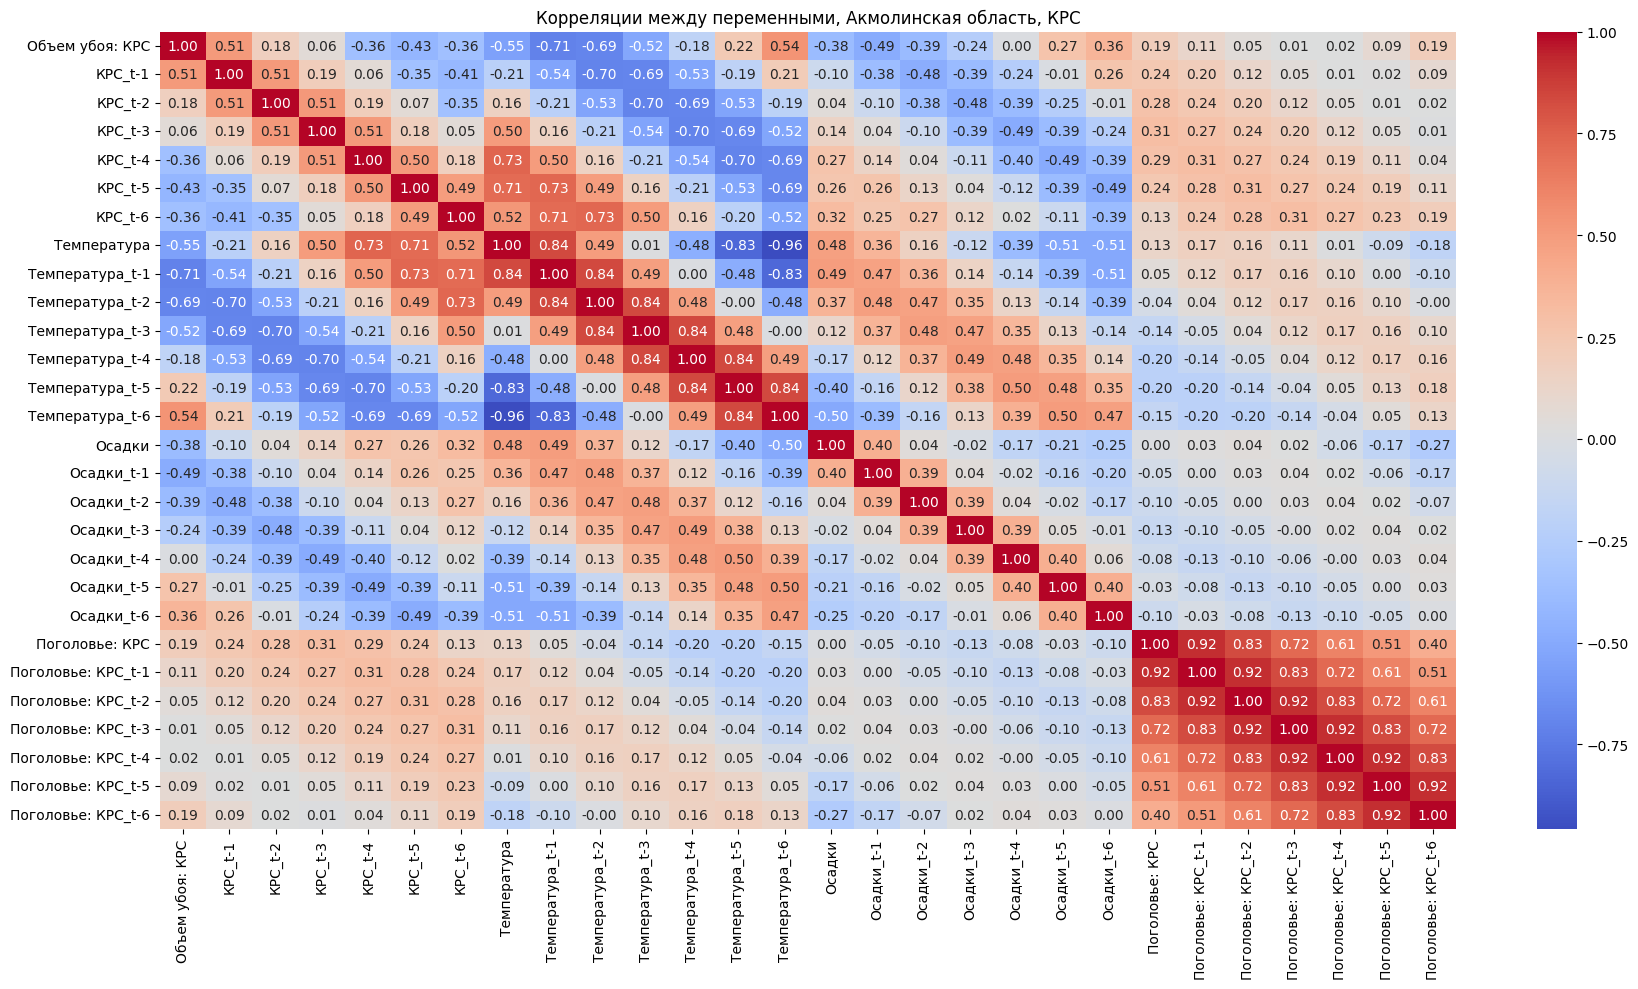

In [281]:
df_corr = df_akmola_full[[col for col in df_akmola_full.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()

# 1. Correlation matrix
corr_matrix = df_corr.corr()

# 2. Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°")
plt.tight_layout()
plt.show()

* –£–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.51) –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∑–∞ –≤—Å–µ —Å–æ—Å–µ–¥—Å—Ç–≤—É—é—â–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã: –º–µ–∂–¥—É t0 –∏ t-1, t-1 –∏ t-2 —Ç–∞–∫ –¥–∞–ª–µ–µ. –≠—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –Ω–∞–ª–∏—á–∏–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö: –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ —Ç–µ–∫—É—â–µ–º –º–µ—Å—è—Ü–µ —á–∞—Å—Ç–∏—á–Ω–æ –æ–±—ä—è—Å–Ω—è—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ —Å–æ—Å–µ–¥–Ω–∏—Ö –º–µ—Å—è—Ü–∞—Ö. –≠—Ç–æ —Ç–∏–ø–∏—á–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –∞–≥—Ä–∞—Ä–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ, –≥–¥–µ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–æ—Ü–µ—Å—Å—ã –∏–º–µ—é—Ç –∏–Ω–µ—Ä—Ü–∏–æ–Ω–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä. –≠—Ç–æ —Ç–∞–∫–∂–µ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (AR, ARIMA, SARIMA) –º–æ–≥—É—Ç —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ —Ç–µ–∫—É—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è "–ø–æ—Ö–æ–∂–∏" –Ω–∞ –Ω–µ–¥–∞–≤–Ω–∏–µ;
* –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –æ–±–µ–º–∞ —É–±–æ—è —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ –∏ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–µ—Å—è—Ü–µ–≤ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –æ—Å–ª–∞–±–µ–≤–∞–µ—Ç, –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –ø–æ—Å–ª–µ –ª–∞–≥–∞ –≤ t-3. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–æ–π –æ–±—ä—ë–º –¥–∞–Ω–Ω—ã—Ö —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è –∑–∞ —Å—á—ë—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç–∏ –∫—Ä–µ—Å—Ç—å—è–Ω—Å–∫–∏—Ö/—Ñ–µ—Ä–º–µ—Ä—Å–∫–∏—Ö —Ö–æ–∑—è–π—Å—Ç–≤ –∏ —Ö–æ–∑—è–π—Å—Ç–≤ –Ω–∞—Å–µ–ª–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ —Å–¥–∞—é—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç—å –µ–∂–µ–∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ, –º–µ—Å—è—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª—É—á–µ–Ω—ã –ø—É—Ç—ë–º –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π, —á—Ç–æ —Å–≥–ª–∞–∂–∏–≤–∞–µ—Ç –≤–Ω—É—Ç—Ä–∏–∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è, –Ω–æ —Å–Ω–∏–∂–∞–µ—Ç —Å–≤—è–∑—å –º–µ–∂–¥—É –∫–≤–∞—Ä—Ç–∞–ª–∞–º–∏.
* –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –∏ –æ—Å–∞–¥–∫–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –∑–∞ –±–ª–∏–∂–∞–π—à–∏–µ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º–µ—Å—è—Ü—ã, —É–º–µ—Ä–µ–Ω–Ω–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±–µ–º–∞ —É–±–æ—è; 
* –ú–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∏ –ø–æ–≥–æ–ª–æ–≤—å—è –≤ —Ä–∞–º–∫–∞—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ç–µ–∫—É—â–µ–≥–æ –∏ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–µ—Å—è—Ü–µ–≤ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–ª–∞–±–∞—è (0.19 –∏ 0.12).

In [282]:
# Set your target variable
target_var = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"

# Get correlations with the target variable
target_corr = corr_matrix[target_var].drop(target_var)  # exclude self-correlation

# Keep only features with |correlation| >= 0.5
selected_vars = target_corr[abs(target_corr) >= 0.5].index.tolist()

print("‚úÖ –û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π >= 0.5:")
print(selected_vars)

# Optionally: create new dataframe with selected variables + target
df_selected = df_akmola_full[['–ü–µ—Ä–∏–æ–¥'] + selected_vars + [target_var]]
df_selected

‚úÖ –û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π >= 0.5:
['–ö–†–°_t-1', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6']


–ü–µ—Ä–∏–æ–¥  –ö–†–°_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  \
0   2015-01-01      NaN   -12.490323              NaN              NaN   
1   2015-02-01  4455.35   -10.192857       -12.490323              NaN   
2   2015-03-01  3654.20    -5.870968       -10.192857       -12.490323   
3   2015-04-01  4287.08     4.490000        -5.870968       -10.192857   
4   2015-05-01  3923.21    14.574194         4.490000        -5.870968   
..         ...      ...          ...              ...              ...   
115 2024-08-01  2029.47    17.338710        20.270968        21.043333   
116 2024-09-01  2412.70    11.300000        17.338710        20.270968   
117 2024-10-01  2909.66     3.832258        11.300000        17.338710   
118 2024-11-01  2608.27    -4.343333         3.832258        11.300000   
119 2024-12-01  3649.19    -7.638710        -4.343333         3.832258   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  
0                NaN              NaN          4455.35  
1                NaN              NaN          3654.20  
2                NaN              NaN          4287.08  
3         -12.490323              NaN          3923.21  
4         -10.192857              NaN          3849.70  
..               ...              ...              ...  
115        10.696774       -13.644828          2412.70  
116        21.043333        -4.809677          2909.66  
117        20.270968         8.026667          2608.27  
118        17.338710        10.696774          3649.19  
119        11.300000        21.043333          4253.58  

[120 rows x 8 columns]

In [283]:
df_vif = df_selected[[col for col in df_selected.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()

X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data.sort_values('VIF')

Variable        VIF
1          –ö–†–°_t-1   2.143338
5  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  13.618455
6  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  14.624599
2      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  17.070220
4  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  18.906931
3  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  21.718738
0            const  44.278197

Step-by-Step Strategy to Handle High VIFs:

Sort VIFs in descending order
Drop variables one at a time, starting with the one that has the highest VIF.

Check domain relevance
Keep variables that are theoretically important or core to your hypothesis, even if VIF is high.

Evaluate correlation matrix
If two variables have high correlation with each other, and both have high VIFs, drop the one less correlated with the target.

Recalculate VIF after each drop
After dropping one variable, recalculate all VIFs. Sometimes removing just one variable significantly reduces others.

Use stepwise selection (optional)
Automated methods like backward elimination can help drop redundant predictors based on model fit and VIF thresholds.

In [284]:
df_selected = df_selected.drop(columns = ['–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6'])
df_selected

–ü–µ—Ä–∏–æ–¥  –ö–†–°_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°
0   2015-01-01      NaN              NaN          4455.35
1   2015-02-01  4455.35       -12.490323          3654.20
2   2015-03-01  3654.20       -10.192857          4287.08
3   2015-04-01  4287.08        -5.870968          3923.21
4   2015-05-01  3923.21         4.490000          3849.70
..         ...      ...              ...              ...
115 2024-08-01  2029.47        20.270968          2412.70
116 2024-09-01  2412.70        17.338710          2909.66
117 2024-10-01  2909.66        11.300000          2608.27
118 2024-11-01  2608.27         3.832258          3649.19
119 2024-12-01  3649.19        -4.343333          4253.58

[120 rows x 4 columns]

In [285]:
df_vif = df_selected[[col for col in df_selected.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()
X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data.sort_values('VIF')

Variable        VIF
1          –ö–†–°_t-1   1.403348
2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1   1.403348
0            const  25.526361

In [286]:
df_selected = df_selected.dropna().copy()
df_selected

–ü–µ—Ä–∏–æ–¥  –ö–†–°_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°
1   2015-02-01  4455.35       -12.490323          3654.20
2   2015-03-01  3654.20       -10.192857          4287.08
3   2015-04-01  4287.08        -5.870968          3923.21
4   2015-05-01  3923.21         4.490000          3849.70
5   2015-06-01  3849.70        14.574194          4074.13
..         ...      ...              ...              ...
115 2024-08-01  2029.47        20.270968          2412.70
116 2024-09-01  2412.70        17.338710          2909.66
117 2024-10-01  2909.66        11.300000          2608.27
118 2024-11-01  2608.27         3.832258          3649.19
119 2024-12-01  3649.19        -4.343333          4253.58

[119 rows x 4 columns]

### Models

#### –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [287]:
# def forward_selection(data, target, candidate_features, criterion="adj_r2"):
#     remaining = list(candidate_features)
#     selected = []
#     best_score = -float("inf")
#     best_model = None

#     while remaining:
#         scores_with_candidates = []
#         for candidate in remaining:
#             features = selected + [candidate]
#             X = sm.add_constant(data[features])
#             y = data[target]
#             model = sm.OLS(y, X).fit()

#             if criterion == "adj_r2":
#                 score = model.rsquared_adj
#             elif criterion == "aic":
#                 score = -model.aic  # negative for maximizing
#             else:
#                 raise ValueError("criterion must be 'adj_r2' or 'aic'")

#             scores_with_candidates.append((score, candidate, model))

#         scores_with_candidates.sort(reverse=True)
#         best_new_score, best_candidate, model = scores_with_candidates[0]

#         if best_new_score > best_score:
#             remaining.remove(best_candidate)
#             selected.append(best_candidate)
#             best_score = best_new_score
#             best_model = model
#             print(f"‚úÖ Added: {best_candidate}, {criterion.upper()}: {best_score:.4f}")
#         else:
#             print("‚õî No improvement. Stopping.")
#             break

#     return selected, best_model


In [288]:
# Define target and features
y = df_selected["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]
X = df_selected.drop(columns=["–ü–µ—Ä–∏–æ–¥", "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"])

# Add constant term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        –û–±—ä–µ–º —É–±–æ—è: –ö–†–°   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     60.68
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           9.24e-19
Time:                        18:45:52   Log-Likelihood:                -936.12
No. Observations:                 119   AIC:                             1878.
Df Residuals:                     116   BIC:                             1887.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3121.6330    

In [290]:
df_selected

–ü–µ—Ä–∏–æ–¥  –ö–†–°_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°
1   2015-02-01  4455.35       -12.490323          3654.20
2   2015-03-01  3654.20       -10.192857          4287.08
3   2015-04-01  4287.08        -5.870968          3923.21
4   2015-05-01  3923.21         4.490000          3849.70
5   2015-06-01  3849.70        14.574194          4074.13
..         ...      ...              ...              ...
115 2024-08-01  2029.47        20.270968          2412.70
116 2024-09-01  2412.70        17.338710          2909.66
117 2024-10-01  2909.66        11.300000          2608.27
118 2024-11-01  2608.27         3.832258          3649.19
119 2024-12-01  3649.19        -4.343333          4253.58

[119 rows x 4 columns]

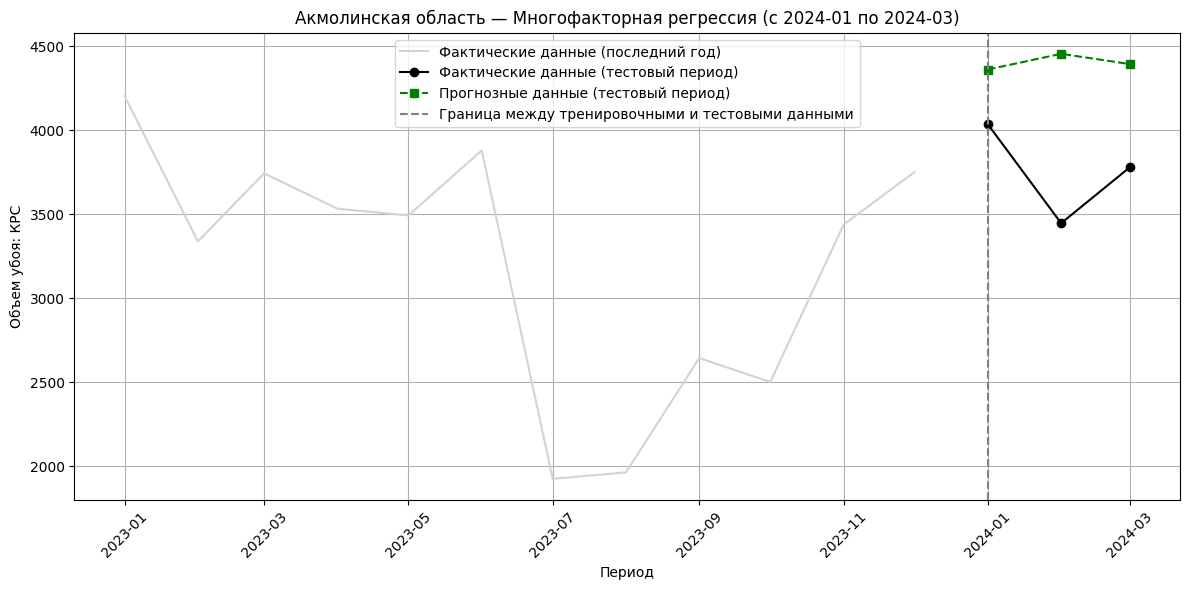

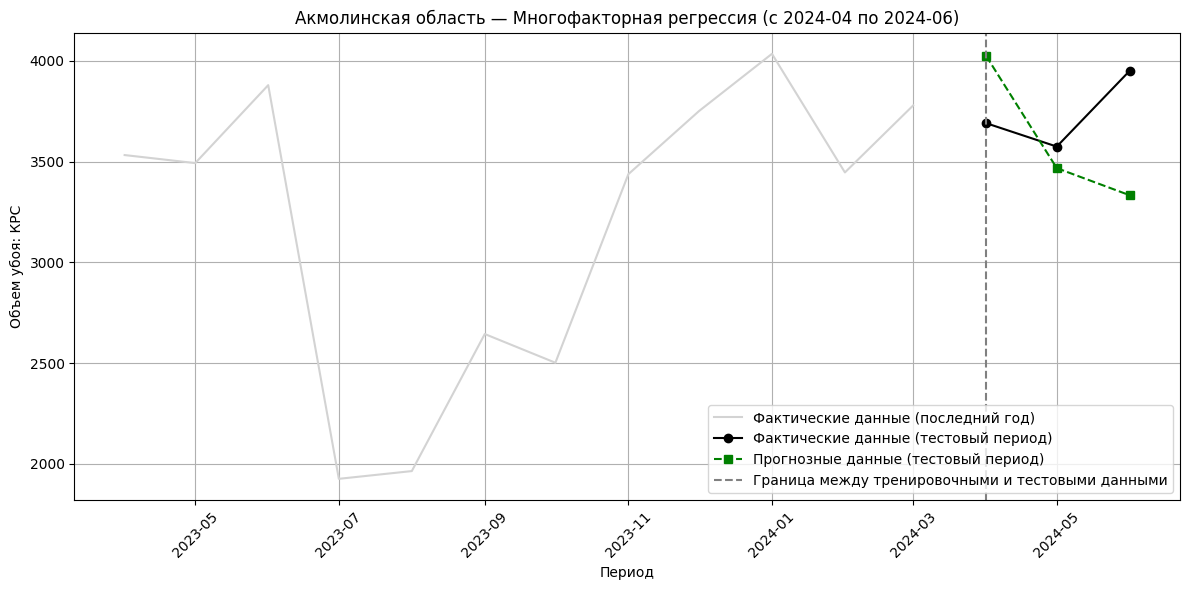

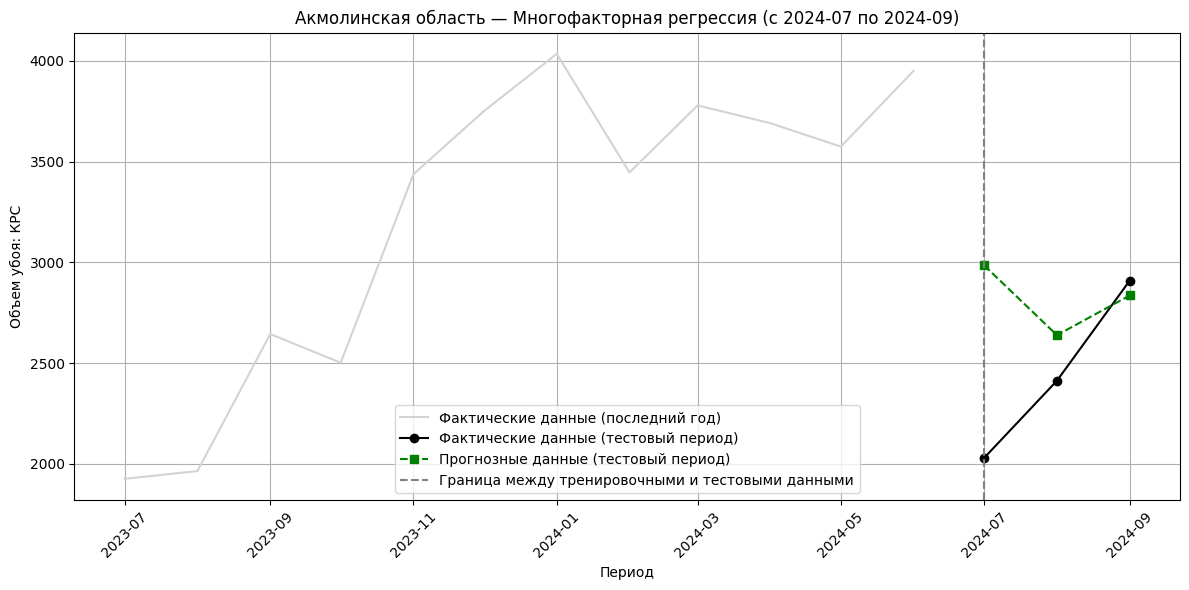

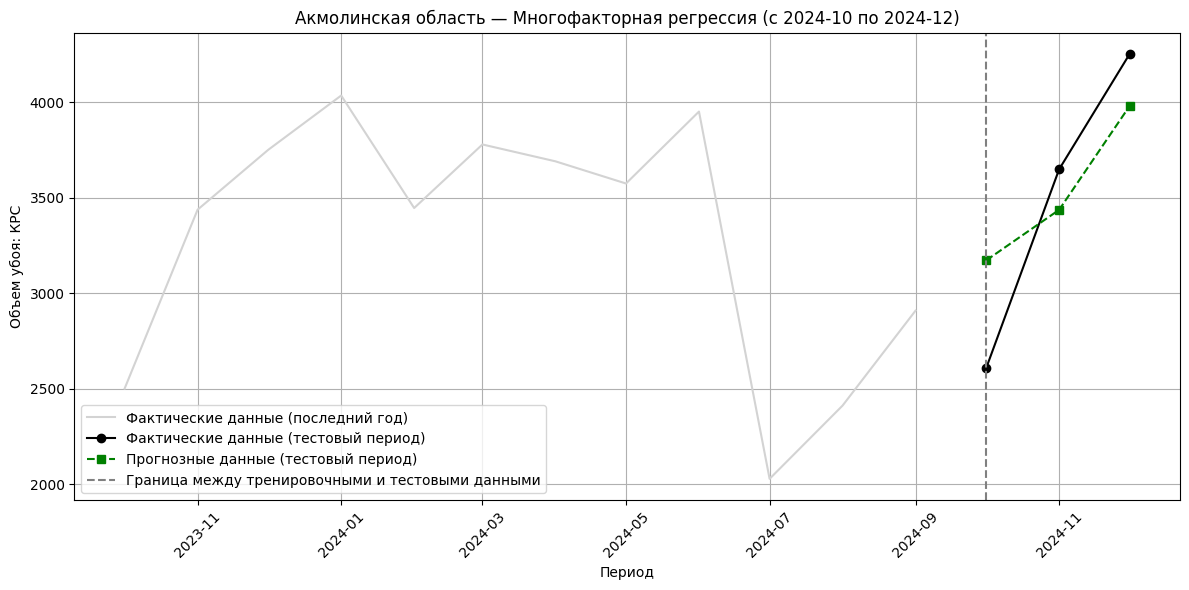

In [293]:
df = df_selected.sort_values("–ü–µ—Ä–∏–æ–¥").copy()

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
features = [col for col in df_selected.columns if col not in ['–ü–µ—Ä–∏–æ–¥', '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°']]

results = []

# Define 4 rolling test sets for 2024
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    X_train = sm.add_constant(train_df[features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        # "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [294]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period        RMSE         MAE   MAPE (%)
0  2024-01 to 2024-03  707.056575  649.419356  17.859737
1  2024-04 to 2024-06  410.230560  352.890504   9.224227
2  2024-07 to 2024-09  568.628892  418.536520  19.666694
3  2024-10 to 2024-12  381.772797  349.424766  11.278686
4             Average  516.922206  442.567786  14.507336


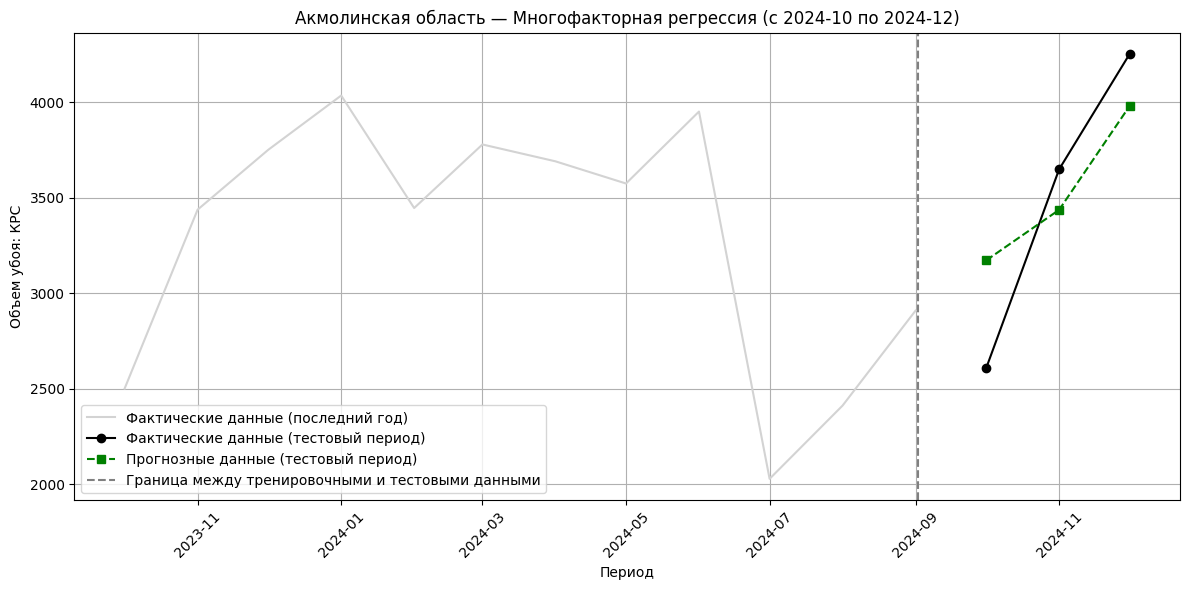

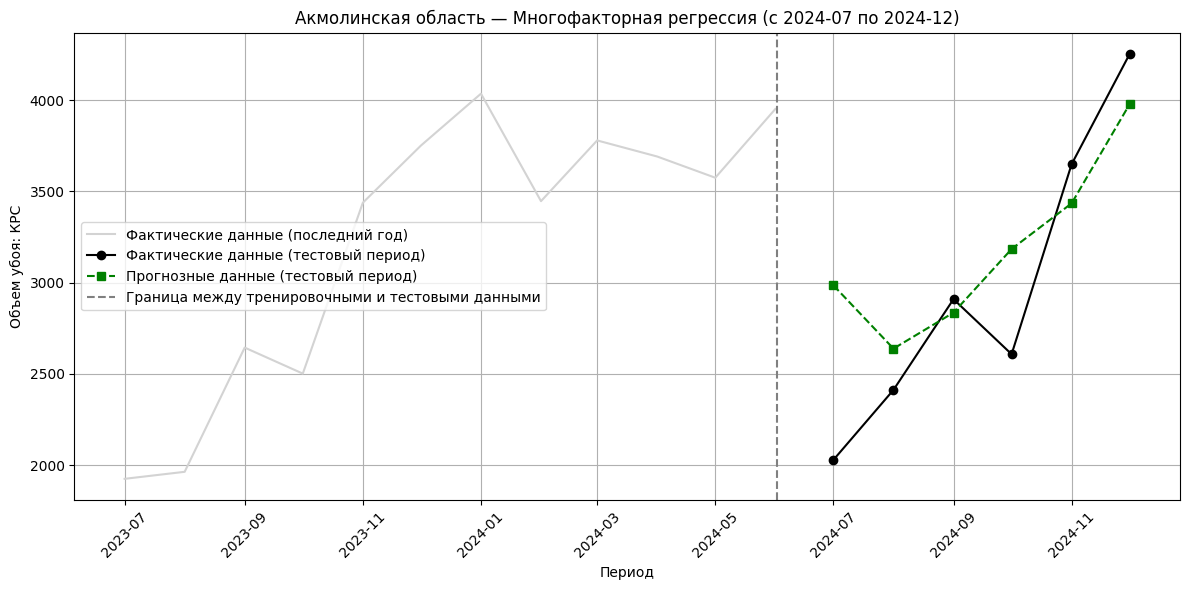

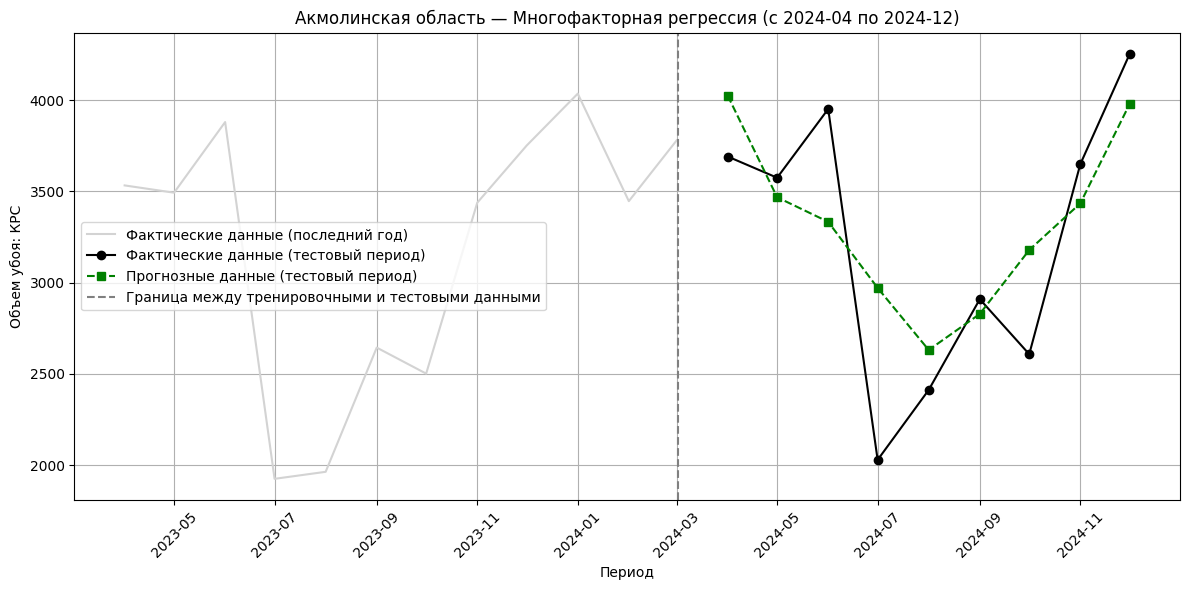

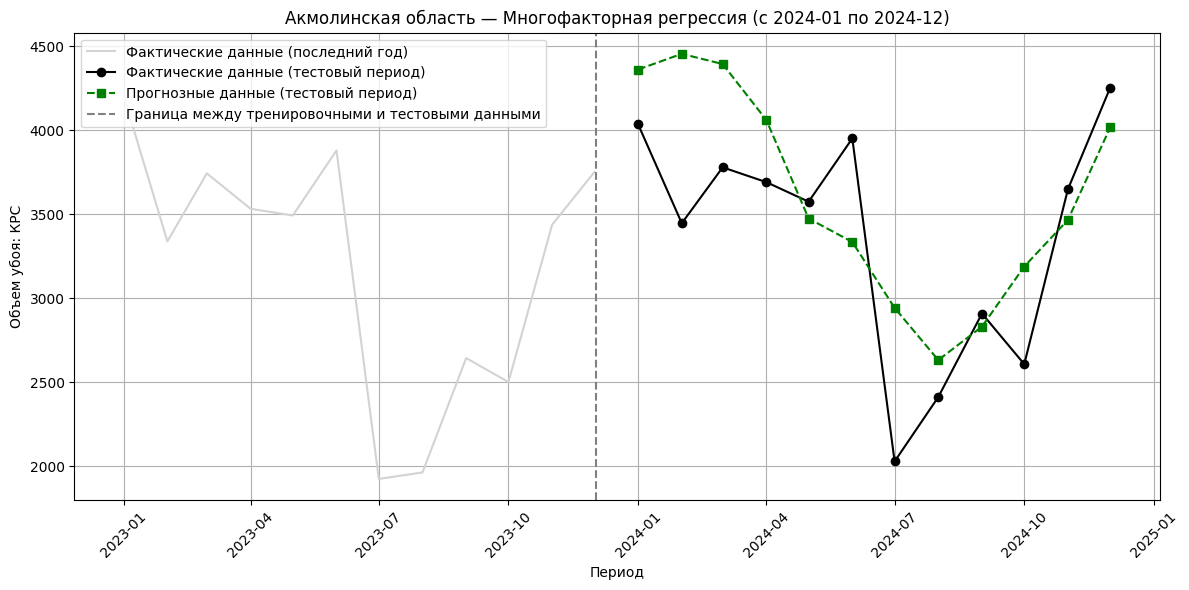

In [297]:
results = []

# Define 4 rolling test sets for 2024
horizons = [3, 6, 9, 12]

for horizon in horizons:

    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    X_train = sm.add_constant(train_df[features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        # "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [298]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period        RMSE         MAE   MAPE (%)
0  2024-10 to 2024-12  381.772797  349.424766  11.278686
1  2024-07 to 2024-12  487.048987  386.806124  15.570101
2  2024-04 to 2024-12  458.606082  373.227105  13.346326
3  2024-01 to 2024-12  527.749724  437.163192  14.303707
4             Average  463.794397  386.655297  13.624705


#### SARIMA (auto-arima)

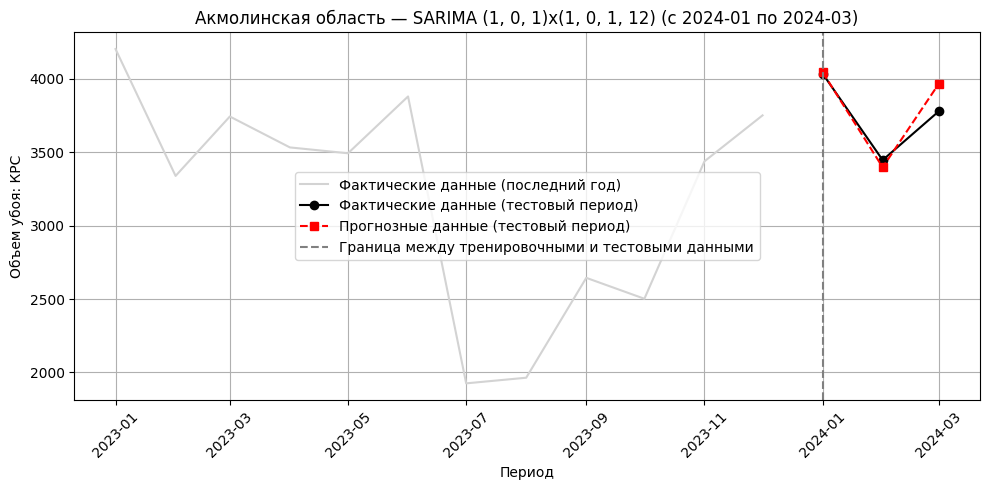

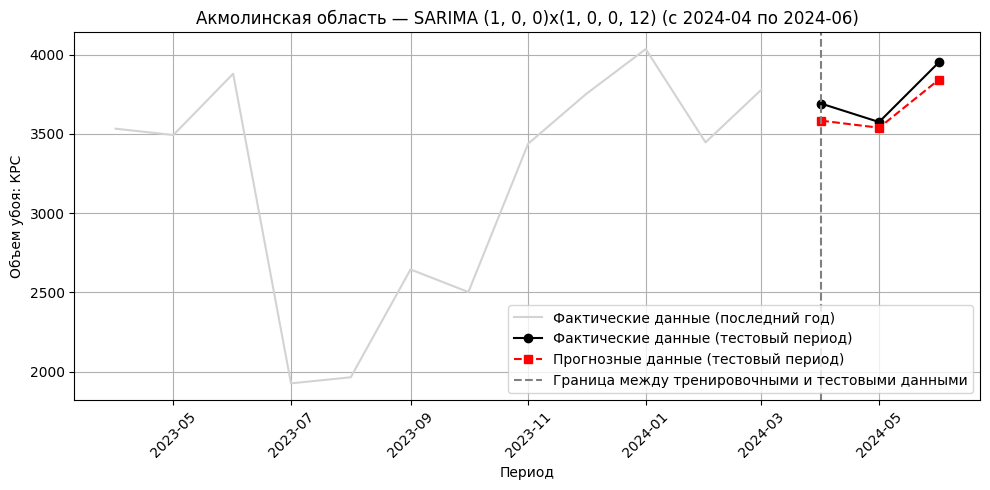

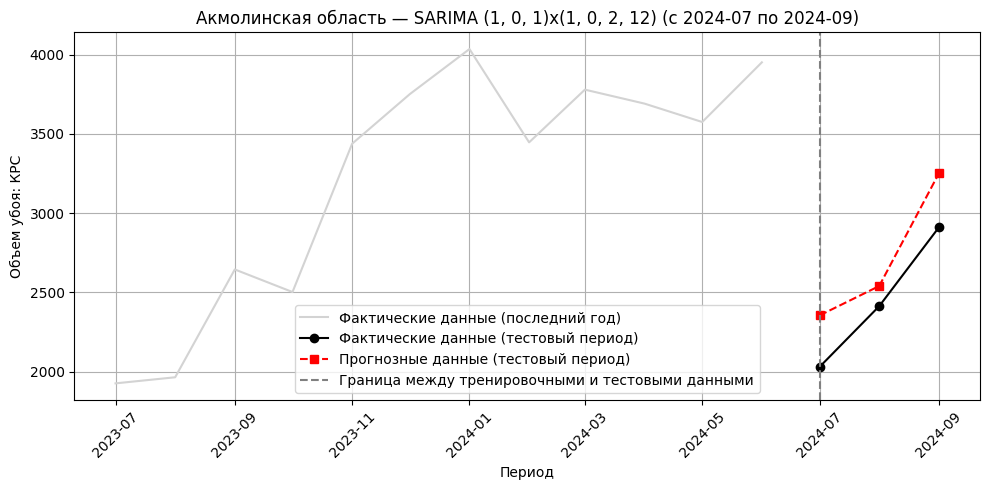

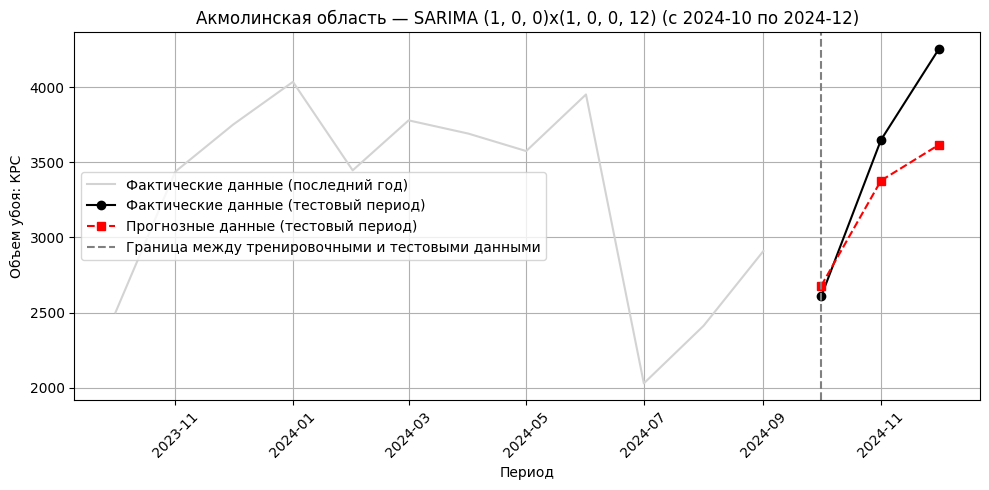

In [ ]:
results = []

# –û–ø—Ä–µ–¥–µ–ª–∏–º 4 —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–∞ –Ω–∞ 3 –º–µ—Å—è—Ü–∞
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=3)
        forecast = pd.Series(forecast).reset_index(drop=True)


        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {test_start.strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        # print("Zero values in y_test:", (y_test == 0).sum())


    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [301]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period        RMSE         MAE   MAPE (%) SARIMA order  \
0  2024-01 to 2024-03  112.071632   82.192227   2.211213    (1, 0, 1)   
1  2024-04 to 2024-06   91.067708   84.404452   2.232143    (1, 0, 0)   
2  2024-07 to 2024-09  281.620511  264.284817  10.997468    (1, 0, 1)   
3  2024-10 to 2024-12  401.945396  326.210621   8.368402    (1, 0, 0)   
4             Average  221.676311  189.273029   5.952307          NaN   

  Seasonal order  
0  (1, 0, 1, 12)  
1  (1, 0, 0, 12)  
2  (1, 0, 2, 12)  
3  (1, 0, 0, 12)  
4            NaN  


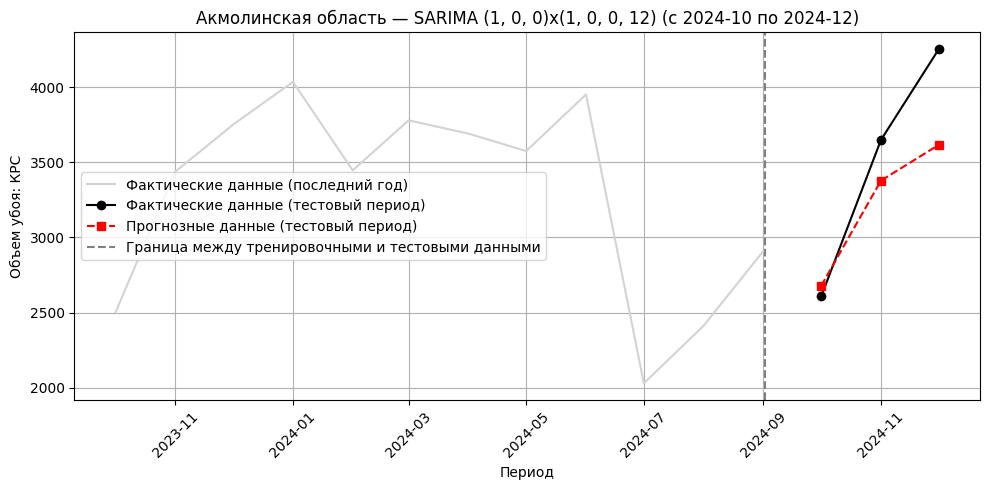

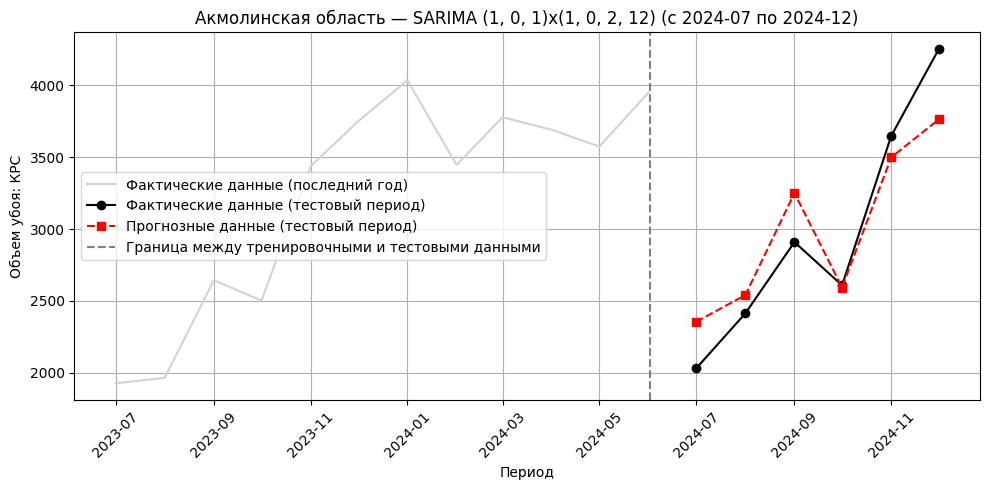

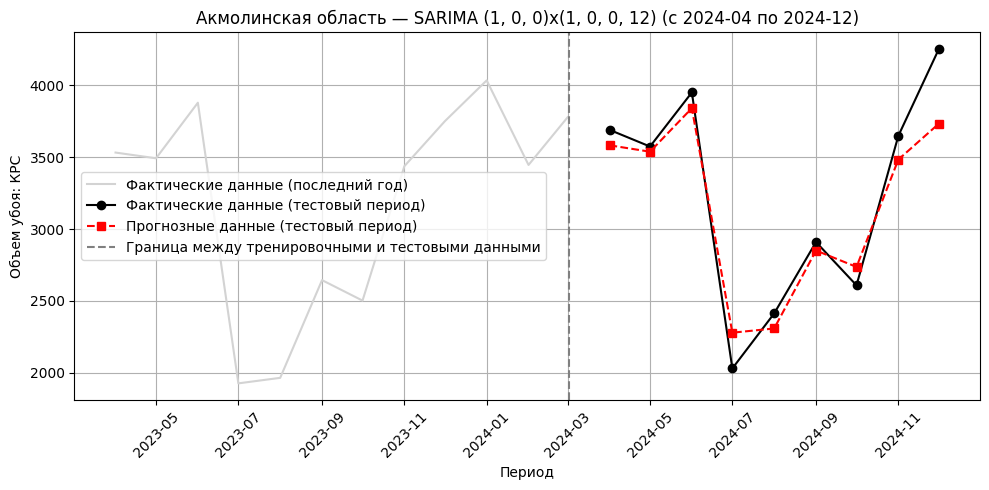

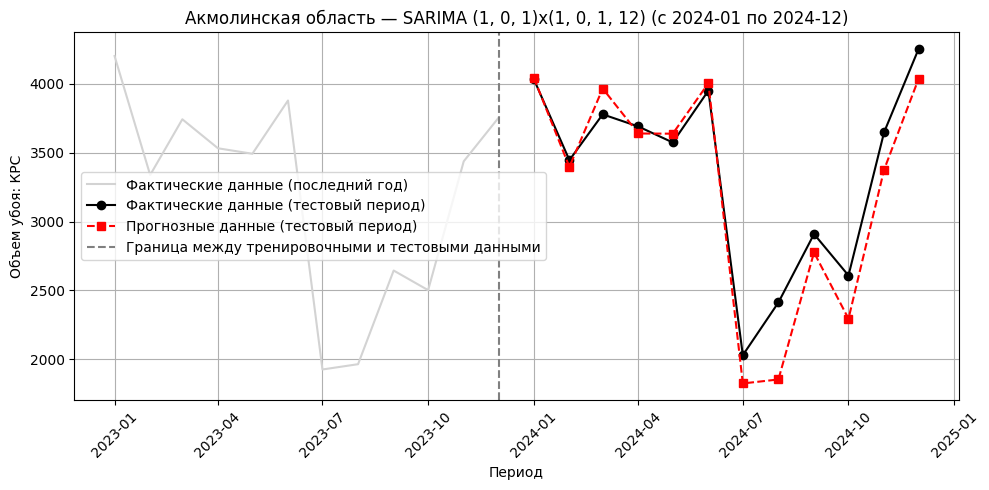

In [302]:
results = []

horizons = [3, 6, 9, 12]

for horizon in horizons:

    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)
    
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=horizon)
        forecast = pd.Series(forecast).reset_index(drop=True)

        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [303]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period        RMSE         MAE  MAPE (%) SARIMA order  \
0  2024-10 to 2024-12  401.945396  326.210621  8.368402    (1, 0, 0)   
1  2024-07 to 2024-12  288.753406  241.298399  8.200461    (1, 0, 1)   
2  2024-04 to 2024-12  214.746836  164.346897  5.222162    (1, 0, 0)   
3  2024-01 to 2024-12  230.971847  176.396643  6.138159    (1, 0, 1)   
4             Average  284.104371  227.063140  6.982296          NaN   

  Seasonal order  
0  (1, 0, 0, 12)  
1  (1, 0, 2, 12)  
2  (1, 0, 0, 12)  
3  (1, 0, 1, 12)  
4            NaN  


#### SARIMAX

In [ ]:
results = []

start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[features].reset_index(drop=True)
    exog_test = test_df[features].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(1, 0, 1),
            seasonal_order=(1, 0, 1, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=3, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMAX (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [ ]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)



In [ ]:
results = []

horizons = [3, 6, 9, 12]

for horizon in horizons:
    # test_start = pd.to_datetime(start)
    # test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[features].reset_index(drop=True)
    exog_test = test_df[features].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(1, 0, 0),
            seasonal_order=(1, 0, 0, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=horizon, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMAX (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [ ]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)

#### Prophet

19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:26 - cmdstanpy - INFO - Chain [1] done processing


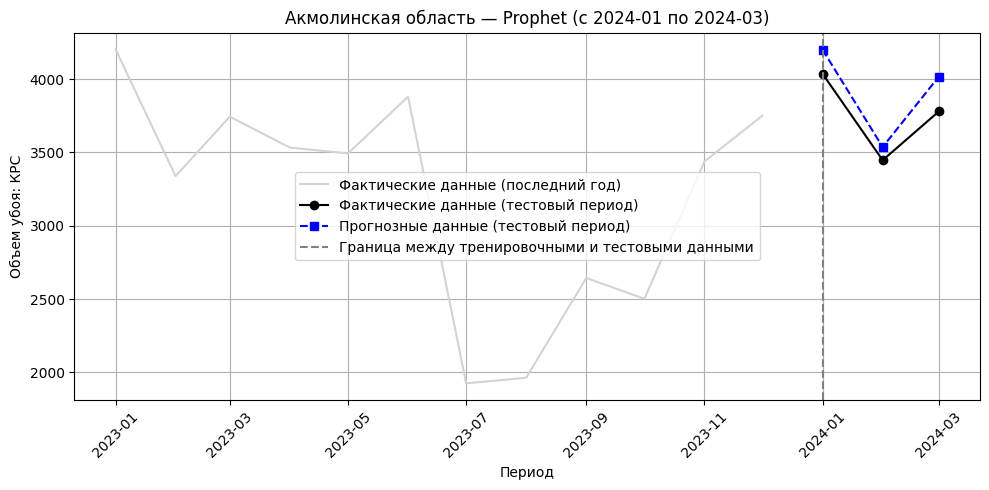

19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:26 - cmdstanpy - INFO - Chain [1] done processing


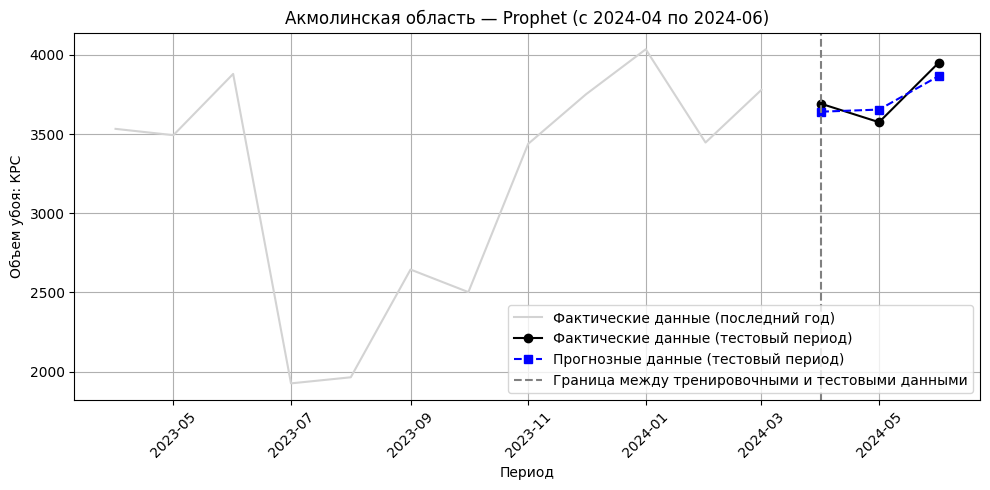

19:20:27 - cmdstanpy - INFO - Chain [1] start processing
19:20:27 - cmdstanpy - INFO - Chain [1] done processing


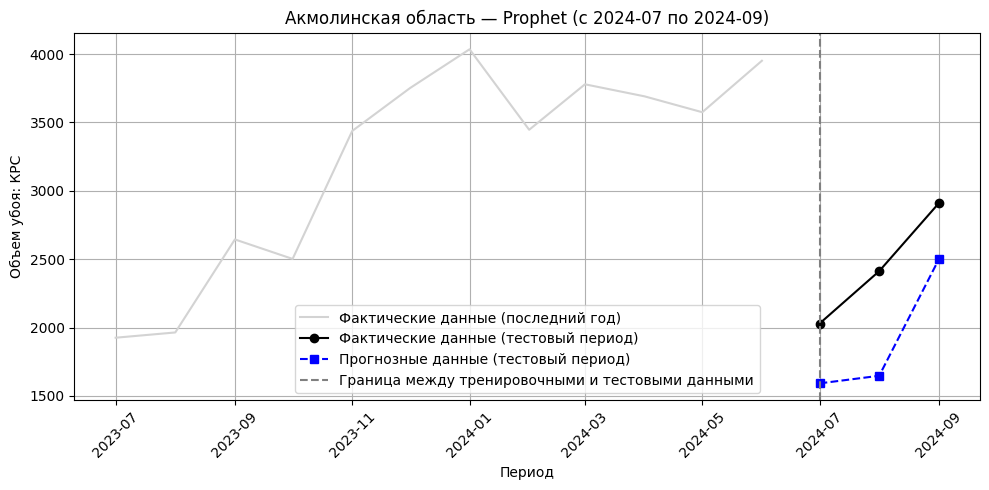

19:20:27 - cmdstanpy - INFO - Chain [1] start processing
19:20:27 - cmdstanpy - INFO - Chain [1] done processing


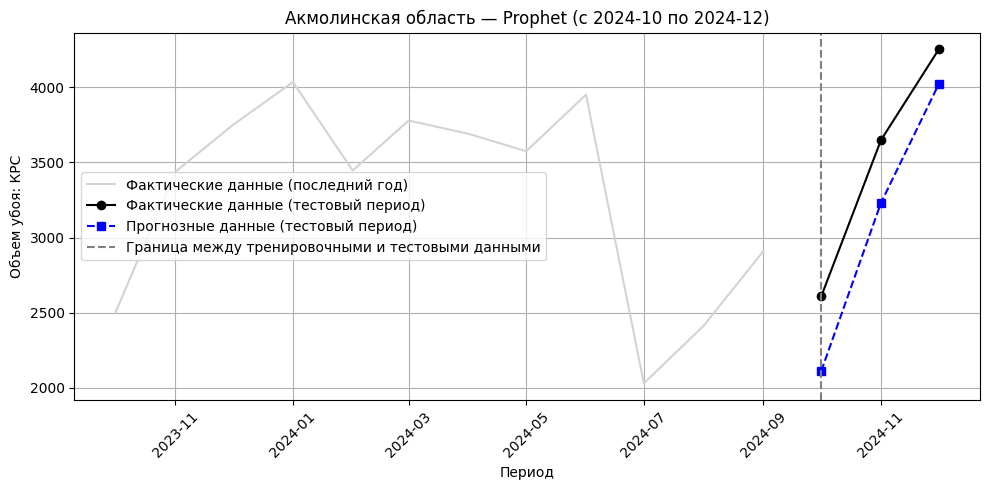

In [ ]:
results = []

# Define 4 test periods
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Train/test split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Initialize Prophet
    model = Prophet()

    # Optional: add regressors
    # model.add_regressor("–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1")
    # prophet_train["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"] = train_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"].values
    # prophet_test["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"] = test_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"].values

    # Fit
    model.fit(prophet_train)

    # Create future dataframe
    future = model.make_future_dataframe(periods=3, freq="M")
    forecast = model.predict(future)
# forecast
# prophet_test

    # Extract forecast for test period only
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî Prophet (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [315]:
results_df = pd.DataFrame(results)
avg = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg])], ignore_index=True)
print(results_df)

          Test period        RMSE         MAE   MAPE (%)
0  2024-01 to 2024-03  174.376646  163.697319   4.316370
1  2024-04 to 2024-06   73.022584   71.366810   1.906491
2  2024-07 to 2024-09  561.526946  537.861728  22.466480
3  2024-10 to 2024-12  398.146060  382.183370  11.986217
4             Average  301.768059  288.777307  10.168890


19:21:35 - cmdstanpy - INFO - Chain [1] start processing
19:21:35 - cmdstanpy - INFO - Chain [1] done processing


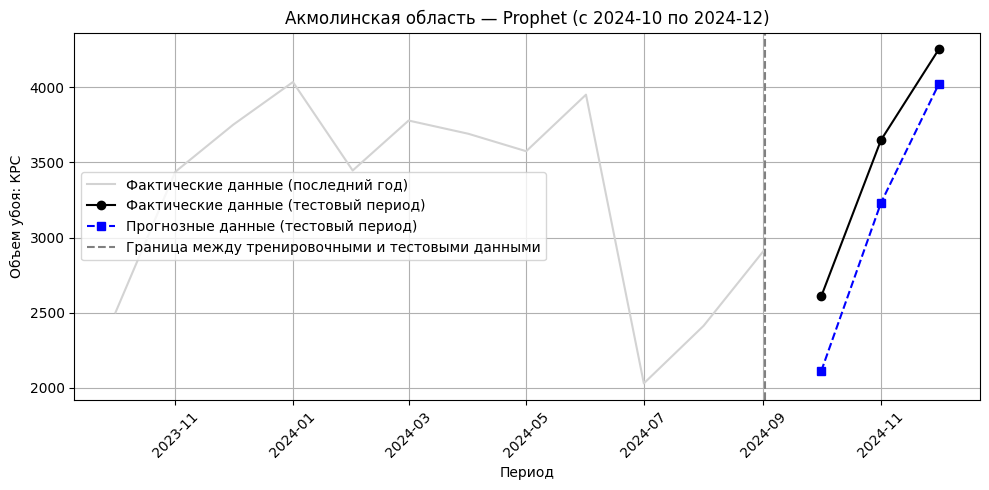

19:21:35 - cmdstanpy - INFO - Chain [1] start processing
19:21:35 - cmdstanpy - INFO - Chain [1] done processing


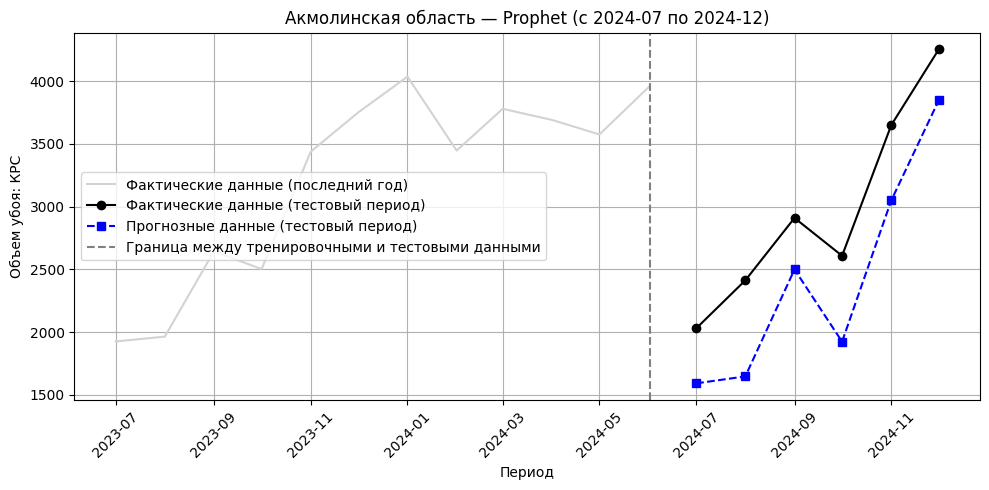

19:21:36 - cmdstanpy - INFO - Chain [1] start processing
19:21:36 - cmdstanpy - INFO - Chain [1] done processing


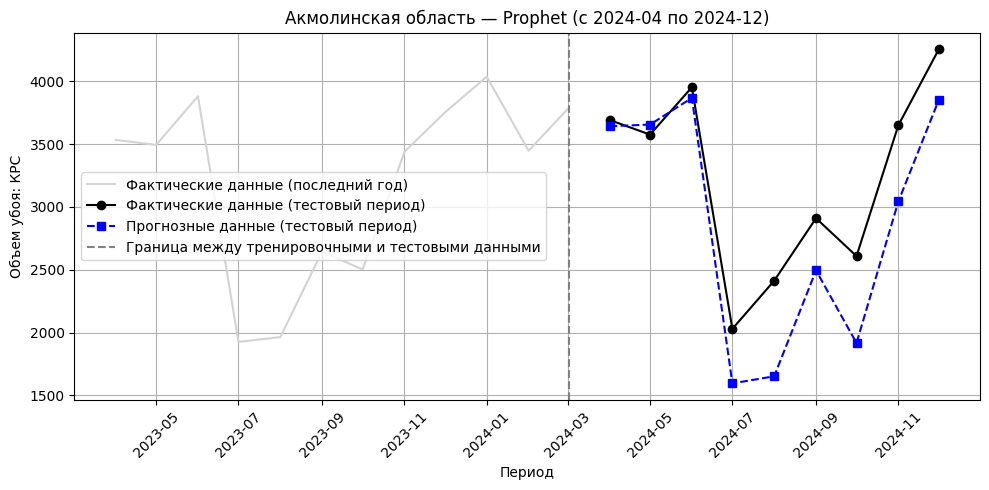

19:21:36 - cmdstanpy - INFO - Chain [1] start processing
19:21:36 - cmdstanpy - INFO - Chain [1] done processing


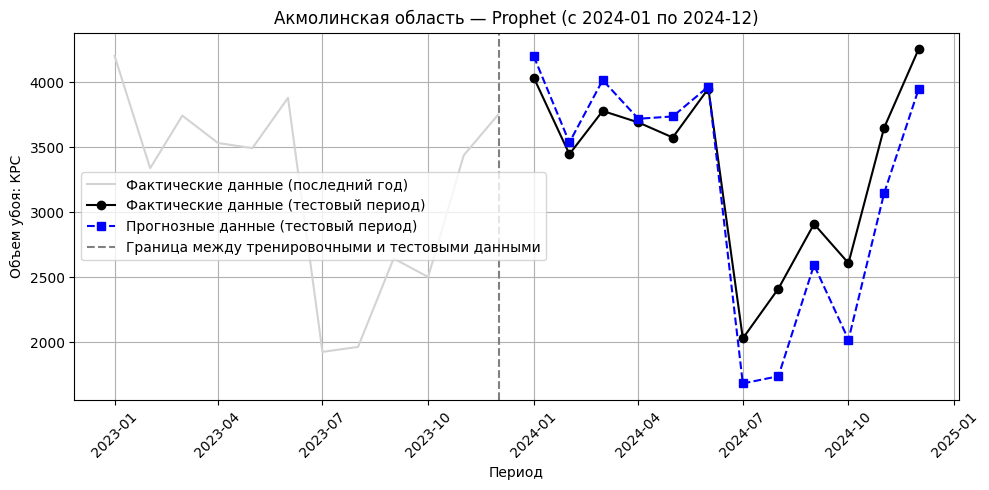

In [316]:
horizons = [3, 6, 9, 12]
results = []

for horizon in horizons:

    # Define train/test split
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Fit Prophet
    model = Prophet()
    model.fit(prophet_train)

    # Forecast
    future = model.make_future_dataframe(periods=horizon, freq="M")
    forecast = model.predict(future)

    # Extract matching forecasted months
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî Prophet (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [319]:
# Summary table
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)

          Test period        RMSE         MAE   MAPE (%)
0  2024-10 to 2024-12  398.146060  382.183370  11.986217
1  2024-07 to 2024-12  568.419628  550.552544  19.934839
2  2024-04 to 2024-12  466.881066  391.444715  13.937699
3  2024-01 to 2024-12  352.168766  286.125236   9.842988
4                 NaN  446.403880  402.576466  13.925436


strength of correlation:
https://link.springer.com/article/10.1057/jt.2009.5#
https://resources.nu.edu/statsresources/correlation